# Pytorch Classification
---

> Add blockquote



In [3]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
# Check PyTorch version
torch.__version__

'2.6.0+cu124'

In [5]:
# Device-agnostic setup
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
# Create data
weight = 0.7
bias = 0.3
X = torch.arange(0, 10, 0.2).unsqueeze(1)
y = weight * X + bias

In [7]:
# Split into training and test sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

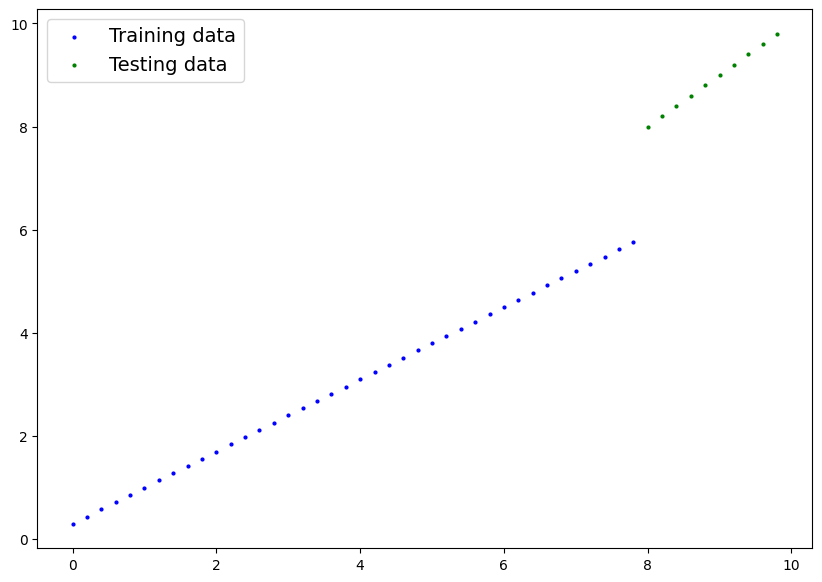

In [8]:
# Function to plot predictions
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_data, c='g', s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

plot_predictions()

In [9]:
# Create simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

model_0 = LinearRegressionModel()

In [10]:
# Loss function and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


In [11]:
# Create simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

model_0 = LinearRegressionModel()

In [12]:
# Training loop
epochs = 200
for epoch in range(epochs):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test loss: {test_loss:.4f}")

Epoch: 0 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 10 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 20 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 30 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 40 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 50 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 60 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 70 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 80 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 90 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 100 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 110 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 120 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 130 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 140 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 150 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 160 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 170 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 180 | Loss: 5.2012 | Test loss: 12.7251
Epoch: 190 | Loss: 5.2012 | Test loss: 12.7251


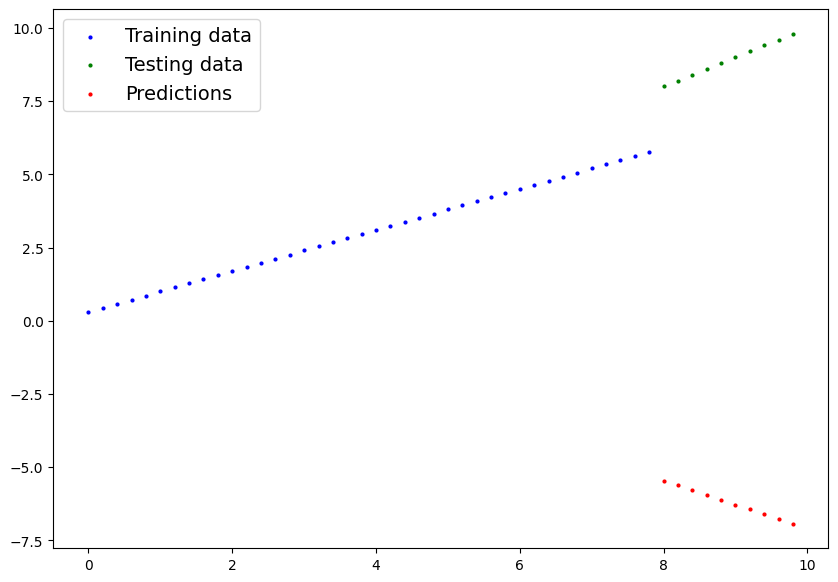

In [13]:
# Evaluation mode
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [14]:
# Save model
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_workflow.pth


In [15]:
# Load model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

print(y_preds == loaded_model_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


In [16]:
# Build improved linear model using nn.Linear
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

model_1 = LinearRegressionModelV2().to(device)

In [17]:
# Loss and optimizer for improved model
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [18]:
# Move data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [19]:
# Training loop for improved model
for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test loss: {test_loss:.4f}")

Epoch: 0 | Loss: 1.4174 | Test loss: 1.7660
Epoch: 10 | Loss: 0.3300 | Test loss: 0.4797
Epoch: 20 | Loss: 0.3128 | Test loss: 0.4383
Epoch: 30 | Loss: 0.2957 | Test loss: 0.4223
Epoch: 40 | Loss: 0.2784 | Test loss: 0.4064
Epoch: 50 | Loss: 0.2612 | Test loss: 0.3650
Epoch: 60 | Loss: 0.2440 | Test loss: 0.3490
Epoch: 70 | Loss: 0.2268 | Test loss: 0.3331
Epoch: 80 | Loss: 0.2095 | Test loss: 0.2917
Epoch: 90 | Loss: 0.1924 | Test loss: 0.2757
Epoch: 100 | Loss: 0.1752 | Test loss: 0.2598
Epoch: 110 | Loss: 0.1579 | Test loss: 0.2184
Epoch: 120 | Loss: 0.1408 | Test loss: 0.2033
Epoch: 130 | Loss: 0.1236 | Test loss: 0.1874
Epoch: 140 | Loss: 0.1063 | Test loss: 0.1478
Epoch: 150 | Loss: 0.0893 | Test loss: 0.1336
Epoch: 160 | Loss: 0.0730 | Test loss: 0.1510
Epoch: 170 | Loss: 0.0697 | Test loss: 0.0074
Epoch: 180 | Loss: 0.0877 | Test loss: 0.0311
Epoch: 190 | Loss: 0.1267 | Test loss: 0.0185


In [20]:
# Save improved model
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [21]:
# Load improved model
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_1.to(device)
loaded_model_1.eval()

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

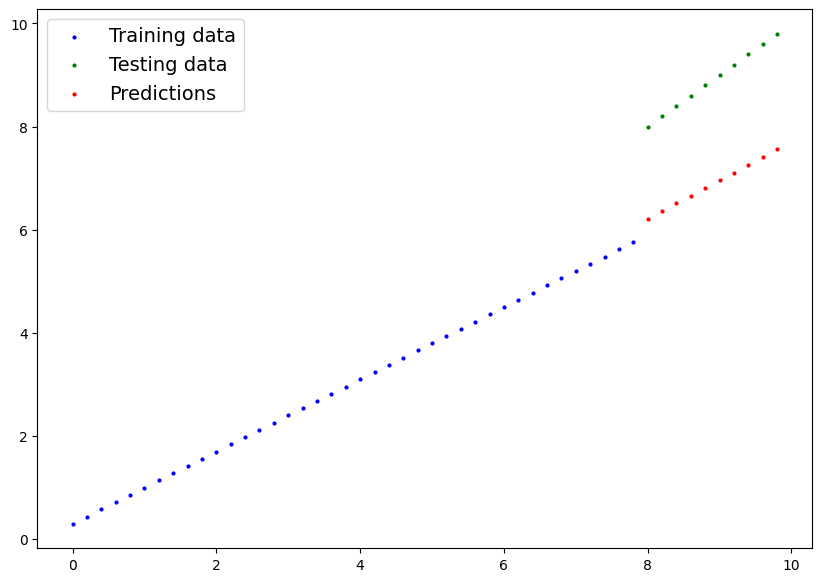

In [22]:
# Predictions from loaded model
with torch.inference_mode():
    y_preds_loaded = loaded_model_1(X_test)

plot_predictions(predictions=y_preds_loaded.cpu())